## Imports

In [2]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [1]:
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for t in range(nt):
        un[:-1,:-1] = u[:-1,:-1] #  boundaries are are fixed to 1 (because the initial vector is ones())
        vn[:-1,:-1] = v[:-1,:-1] #  boundaries are are fixed to 1 (because the initial vector is ones())
        for i in range(1,row):
                for j in range(1,col):
                    u[i,j]=un[i,j]-un[i,j]*dt*(un[i,j]-un[i-1,j])/dx-vn[i,j]*dt*(un[i,j]-un[i,j-1])/dy
                    v[i,j]=vn[i,j]-un[i,j]*dt*(vn[i,j]-vn[i-1,j])/dx-vn[i,j]*dt*(vn[i,j]-vn[i,j-1])/dy
        
    return 0

## Numba accelerator

In [5]:
@njit(fastmath=True)
def solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for t in range(nt):
        un[:-1,:-1] = u[:-1,:-1] #  boundaries are are fixed to 1 (because the initial vector is ones())
        vn[:-1,:-1] = v[:-1,:-1] #  boundaries are are fixed to 1 (because the initial vector is ones())
        for i in range(1,row):
                for j in range(1,col):
                    u[i,j]=un[i,j]-un[i,j]*dt*(un[i,j]-un[i-1,j])/dx-vn[i,j]*dt*(un[i,j]-un[i,j-1])/dy
                    v[i,j]=vn[i,j]-un[i,j]*dt*(vn[i,j]-vn[i-1,j])/dx-vn[i,j]*dt*(vn[i,j]-vn[i,j-1])/dy
        
    return 0

## Pyccel accelerator

In [7]:
@types('float[:,:]','float[:,:]','float[:,:]','float[:,:]','int','float','float','float','float')
def solve_2d_nonlinearconv_pyccel(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for t in range(nt):
        un[:-1,:-1] = u[:-1,:-1] #  boundaries are are fixed to 1 (because the initial vector is ones())
        vn[:-1,:-1] = v[:-1,:-1] #  boundaries are are fixed to 1 (because the initial vector is ones())
        for i in range(1,row):
                for j in range(1,col):
                    u[i,j]=un[i,j]-un[i,j]*dt*(un[i,j]-un[i-1,j])/dx-vn[i,j]*dt*(un[i,j]-un[i,j-1])/dy
                    v[i,j]=vn[i,j]-un[i,j]*dt*(vn[i,j]-vn[i-1,j])/dx-vn[i,j]*dt*(vn[i,j]-vn[i,j-1])/dy
        
    return 0

## Inputs

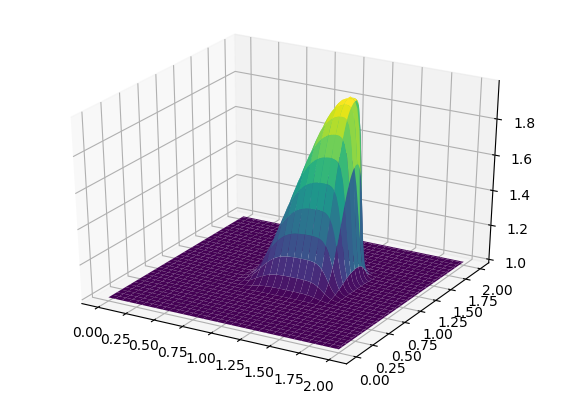

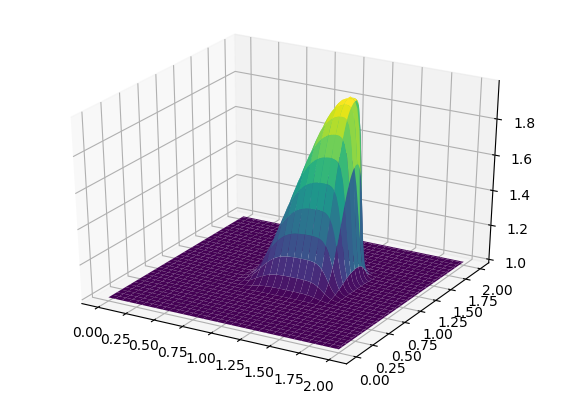

In [13]:
###variable declarations
nx = 101
ny = 101
nt = 80
c = 1.
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))     

solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)


fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis)

## Call Funtions

### Pure function

In [9]:
%timeit solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

4.1 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [10]:
%timeit solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c)

3.35 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [14]:
solve_2d_nonlinearconv_f90 = epyccel(solve_2d_nonlinearconv_pyccel)

In [15]:
%timeit solve_2d_nonlinearconv_f90(u, un, v, vn, nt, dt, dx, dy, c)

6.53 ms ± 56.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
